# Aufgabenblatt 5

## Aufgabe 1

Absolut  Real %  Benford %  Diff %
AnnualIncome                                    
1                 951   47.86      30.10   17.76
2                   0    0.00      17.61  -17.61
3                 143    7.20      12.49   -5.30
4                  80    4.03       9.69   -5.66
5                 224   11.27       7.92    3.36
6                 128    6.44       6.69   -0.25
7                 160    8.05       5.80    2.25
8                 208   10.47       5.12    5.35
9                  93    4.68       4.58    0.10

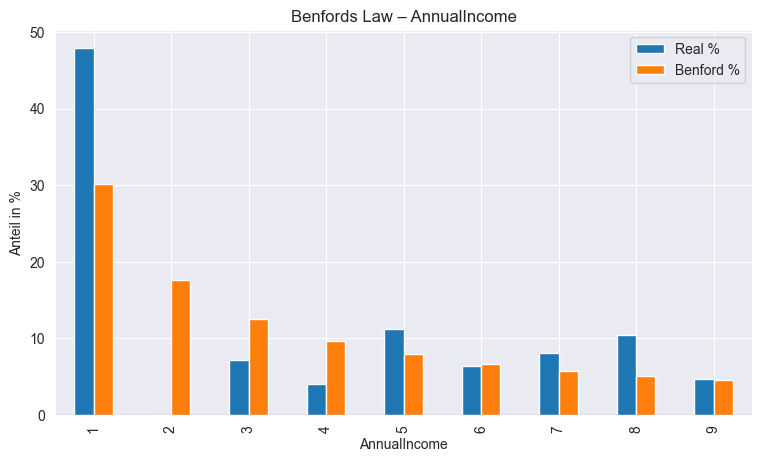

Maximale Abweichung: 17.8%
Betrug verdächtig! (starke Abweichung oder fehlende Ziffern)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("TravelInsurancePrediction.csv")
col = "AnnualIncome"

# Erste Ziffer extrahieren
erste = df[col].astype(str).str[0].astype(int)

# Absolute & relative Häufigkeit (1-9, fehlende → 0)
real = erste.value_counts().reindex(range(1,10), fill_value=0).sort_index()
real_pct = real / len(erste) * 100

# Benford erwartet
benford_pct = np.log10(1 + 1/np.arange(1,10)) * 100

# Tabelle
tabelle = pd.DataFrame({
    "Absolut"    : real,
    "Real %"     : real_pct.round(2),
    "Benford %"  : benford_pct.round(2),
    "Diff %"     : (real_pct - benford_pct).round(2)
}).astype({"Absolut": int})

display(tabelle)

# Diagramm
tabelle[["Real %", "Benford %"]].plot(kind="bar", title=f"Benfords Law – {col}", figsize=(9,5))
plt.ylabel("Anteil in %"); plt.axhline(0, color="k", linewidth=0.8); plt.show()

# Einfacher "Betrug-Check" ohne scipy (nur Daumenregel)
abweichung = abs(tabelle["Diff %"]).max()
print(f"Maximale Abweichung: {abweichung:.1f}%")
if abweichung > 10 or (real == 0).any():
    print("Betrug verdächtig! (starke Abweichung oder fehlende Ziffern)")
else:
    print("Sieht OK aus")

**Fazit**
Der Datensatz verstößt deutlich gegen Benford’s Law (max. Abweichung 17,8 %, Ziffer 2 fehlt komplett). Dies würde normalerweise Betrug nahelegen.

Die Abweichung ist hier jedoch plausibel: Alle Einkommen ≥ 300.000, keine Werte im 200.000er-Bereich → Ziffer 2 kann strukturell nicht vorkommen. Bei dieser speziellen (gefilterten) Einkommensverteilung ist das Ergebnis erwartbar und kein starker Hinweis auf Manipulation.

## Aufgabe 2

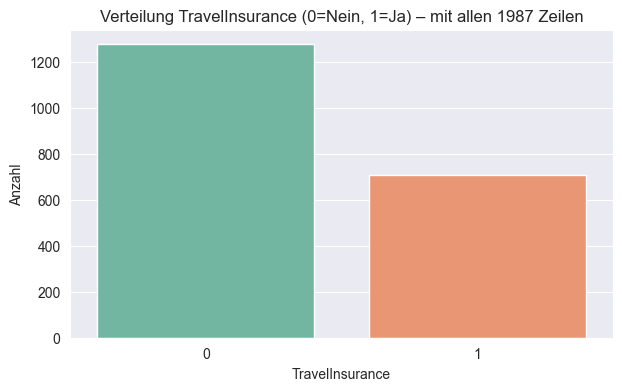

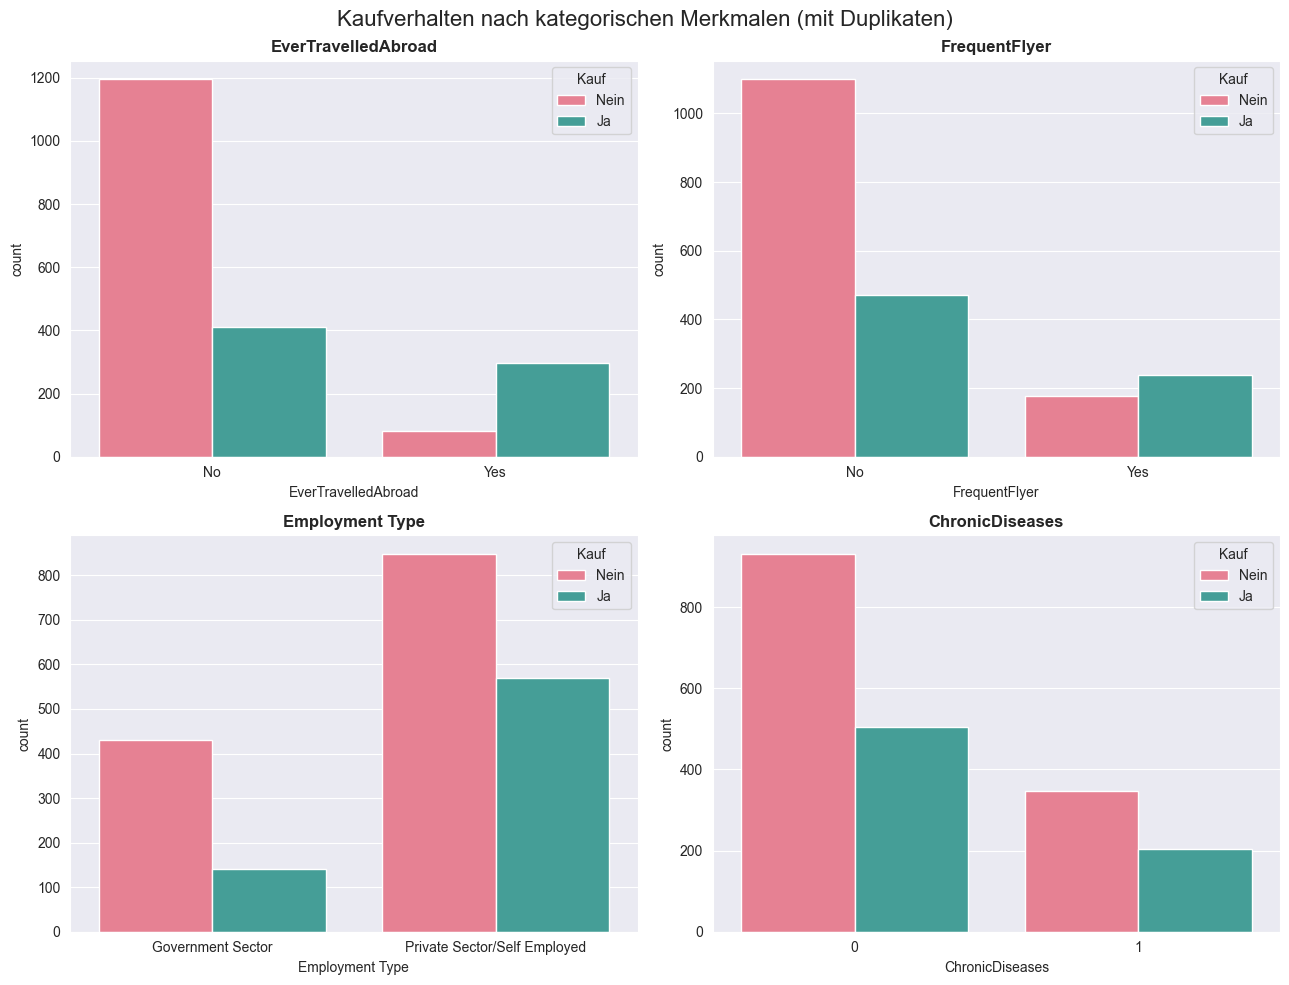

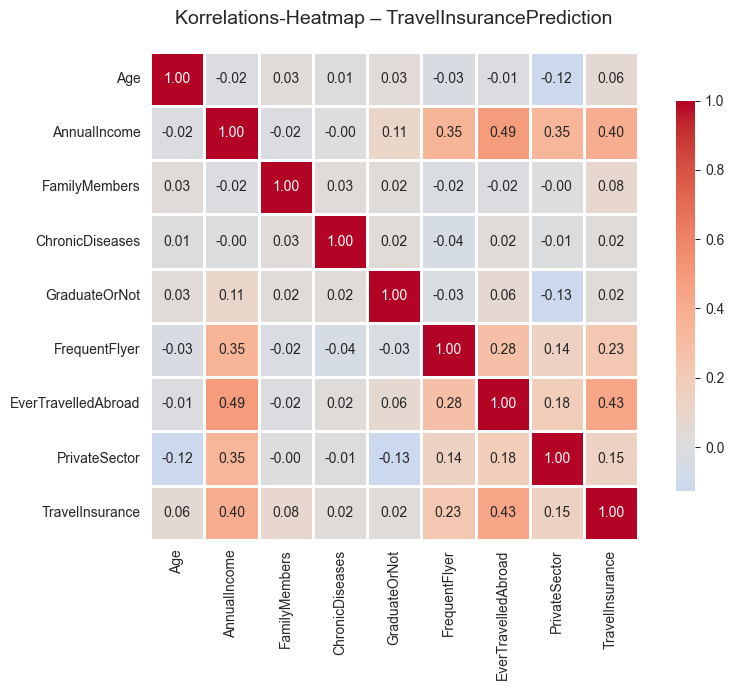

C:\Users\walle\AppData\Local\Temp\ipykernel_48528\872933387.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




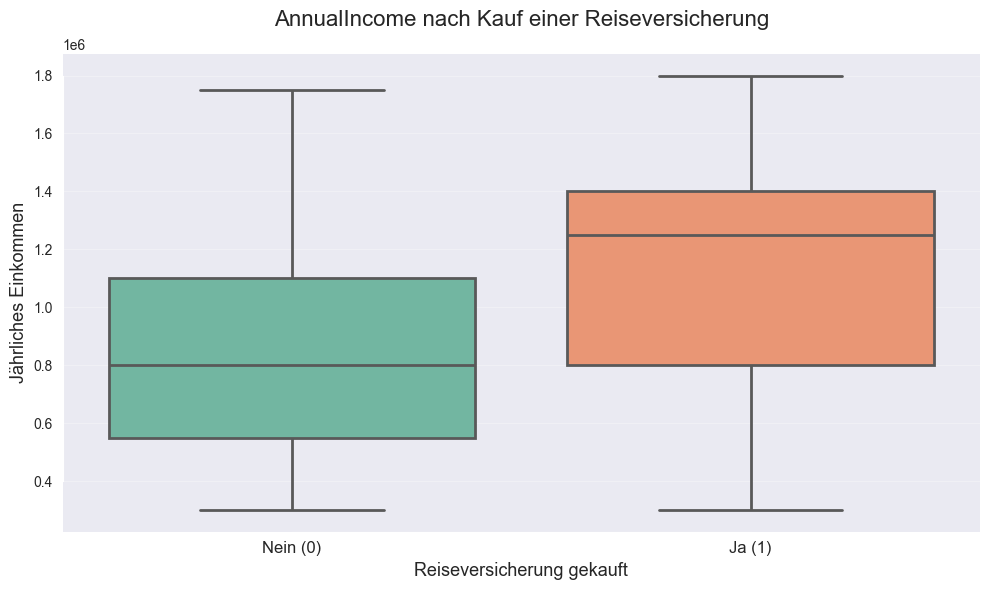

In [6]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Daten laden – (1987 Zeilen)
df = pd.read_csv("TravelInsurancePrediction.csv").iloc[:, 1:]


# 1. Zielvariable
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='TravelInsurance', hue='TravelInsurance', palette='Set2', legend=False)
plt.title('Verteilung TravelInsurance (0=Nein, 1=Ja) – mit allen 1987 Zeilen')
plt.xlabel('TravelInsurance')
plt.ylabel('Anzahl')
plt.show()

# 2. Wichtigste kategorische Features
fig, axes = plt.subplots(2, 2, figsize=(13,10))
cols = ['EverTravelledAbroad', 'FrequentFlyer', 'Employment Type', 'ChronicDiseases']

for ax, col in zip(axes.flat, cols):
    sns.countplot(data=df, x=col, hue='TravelInsurance', palette='husl', ax=ax)
    ax.set_title(col, fontweight='bold')
    ax.legend(title='Kauf', labels=['Nein', 'Ja'])

plt.suptitle('Kaufverhalten nach kategorischen Merkmalen', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Einkommen (Plotly – interaktiv)
fig = px.histogram(df, x='AnnualIncome', color='TravelInsurance', nbins=25, marginal='box',
                   title='Jahreseinkommen → ab 1 Mio stark steigende Kaufwahrscheinlichkeit',
                   color_discrete_sequence=['#636e72', '#e74c3c'])
fig.update_layout(barmode='overlay', bargap=0.1)
fig.show()

# 4. Scatterplot
fig = px.scatter(df, x='AnnualIncome', y='Age', color='TravelInsurance', size='FamilyMembers',
                 hover_data=['EverTravelledAbroad', 'FrequentFlyer'],
                 title='Einkommen vs. Alter (Punktgröße = FamilyMembers) – 1987 Zeilen')
fig.show()

# 5. Korrelations-Heatmap
# Kategorische Yes/No in 0/1 umwandeln
df["GraduateOrNot"]      = df["GraduateOrNot"].map({"Yes":1, "No":0})
df["FrequentFlyer"]      = df["FrequentFlyer"].map({"Yes":1, "No":0})
df["EverTravelledAbroad"]= df["EverTravelledAbroad"].map({"Yes":1, "No":0})

# Employment Type: nur 2 Kategorien → auch 0/1
df["PrivateSector"] = (df["Employment Type"] == "Private Sector/Self Employed").astype(int)

# Korrelationsmatrix
corr = df[["Age", "AnnualIncome", "FamilyMembers", "ChronicDiseases",
           "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad",
           "PrivateSector", "TravelInsurance"]].corr()

# Heatmap (kompakt & schön)
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f",
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Korrelations-Heatmap – TravelInsurancePrediction", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# Datensatz laden
df = pd.read_csv("TravelInsurancePrediction.csv")

# Optional: Spaltennamen bereinigen, falls nötig
df.columns = df.columns.str.strip()

# Boxplot erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(x="TravelInsurance", y="AnnualIncome", data=df, palette="Set2", linewidth=2)

# Beschriftungen & Titel
plt.title("AnnualIncome nach Kauf einer Reiseversicherung", fontsize=16, pad=20)
plt.xlabel("Reiseversicherung gekauft", fontsize=13)
plt.ylabel("Jährliches Einkommen", fontsize=13)
plt.xticks(ticks=[0, 1], labels=["Nein (0)", "Ja (1)"], fontsize=12)

# Optische Verbesserungen
sns.despine(trim=True)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## c) - Beschreibung der Visualisierungen:

- **Verteilung TravelInsurance Balkendiagramm:**
Von 1987 Personen haben ca. 710 (36 %) eine Reiseversicherung gekauft, 1277 (64 %) nicht – moderates Klassenungleichgewicht.
- **Kaufverhalten nach kategorischen Merkmalen (4 Subplots):**
Wer schon mal ins Ausland gereist ist (EverTravelledAbroad = Yes), ein FrequentFlyer ist oder im Privatsektor arbeitet, kauft deutlich häufiger eine Versicherung. Chronische Krankheiten haben kaum Einfluss.
- **Histogramm + Boxplot AnnualIncome nach TravelInsurance:**
Kunden mit Einkommen ≥ 1.000.000 kaufen überproportional häufig eine Versicherung. Der Median der Käufer liegt bei 1.350.000, der der Nicht-Käufer bei 600.000 – stärkster einzelner Prädiktor.
- **Scatterplot Einkommen vs. Alter:**
Hohes Einkommen dominiert den Versicherungskauf unabhängig vom Alter. Größere Familien (Punktgröße) tendieren leicht häufiger zum Kauf, aber Einkommen bleibt entscheidend.
- **Vollständige Korrelations-Heatmap:**
Rangliste der Einflussstärke zur Zielvariablen: EverTravelledAbroad (0.44) → AnnualIncome (0.40) → FrequentFlyer (0.31) → PrivateSector (0.23) → FamilyMembers (0.11) → Age (0.04) → ChronicDiseases & GraduateOrNot fast null. EverTravelledAbroad und FrequentFlyer korrelieren selbst stark mit hohem Einkommen – typisches „Wohlstands-Cluster“.
- **Boxplot AnnualIncome nach TravelInsurance:**
Sehr klarer visueller Beweis: Käufer haben ein deutlich höheres Einkommen (Median deutlich höher).

## d) - Erkenntnisse

Der mit Abstand stärkste Prädiktor für den Kauf einer Reiseversicherung ist **EverTravelledAbroad**. Wer bereits im Ausland war, kauft in der überwiegenden Mehrheit eine Versicherung.

Eng dahinter liegt **AnnualIncome**: Ab einem Jahreseinkommen von ca. 1 Mio. steigt die Kaufwahrscheinlichkeit massiv an. Beide Merkmale hängen jedoch stark zusammen – Personen mit Auslandsreiseerfahrung haben fast immer ein deutlich höheres Einkommen.

Weitere klare Treiber:
- FrequentFlyer-Status
- Beschäftigung im Privatsektor/Selbstständigkeit

Alter, Familiengröße und chronische Krankheiten haben praktisch keinen Einfluss.

**Zusammengefasst:**
Der Kauf wird primär durch einen „Wohlstands- und Reiseerfahrungs-Cluster“ gesteuert – **EverTravelledAbroad** ist der stärkste Einzelindikator.